In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns


ANNOT_CSV_FILE = 'data/GEMS-INN_2023-01-30_expert.csv'


GEMS_9 = ['Wonder', 'Transcendence', 'Nostalgia', 'Tenderness', 'Peacfulness', 'Joy', 'Power', 'Tension', 'Sadness']
NUM_CLASSES = len(GEMS_9)
GENRE_MAP = {'H': 'Hip-Hop', 'K': 'Classical', 'P': 'Pop'}

emma_df = pd.read_csv(ANNOT_CSV_FILE, encoding="ISO-8859-1")
emma_df.dropna(inplace=True)

In [3]:
emma_df

,Unnamed: 0,artist,title,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness,Sublimity,Vitality,Unease,ICC,Familiarity,Liking
0,1,Trailerpark,Schlechter Tag,15.65,19.68,3.54,5.30,5.08,22.33,2.35,11.20,0.00,18.50,21.15,10.50,0.65,2.00,3.17
1,2,Desiigner,Panda,24.69,4.69,0.78,9.30,7.92,28.26,22.73,9.33,1.06,19.39,30.32,8.91,0.76,4.25,3.83
2,3,NAS,Doo Rags,24.43,18.57,14.29,19.88,17.55,24.67,27.48,0.00,2.50,33.45,36.15,2.11,0.58,2.08,4.00
3,4,DMX,X Gon' Give It To Ya,17.27,7.05,9.89,8.60,9.52,37.27,37.77,0.00,0.73,26.05,40.19,0.61,0.86,3.91,4.18
4,5,Xatar,Meine Große Liebe,6.46,15.86,0.00,9.27,0.67,13.86,15.98,3.79,0.00,19.42,19.77,3.38,0.52,2.00,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,Oasis,Don't Look Back In Anger,10.31,7.60,31.85,14.10,15.00,18.47,3.99,6.56,10.03,26.27,17.74,11.55,0.84,3.89,3.44
367,368,Der Junge mit der Gitarre,Hallo Worum Gehts Ich Bin Dagegen,11.20,8.11,0.00,0.00,4.20,27.52,15.02,8.74,1.33,13.45,30.34,9.19,0.89,1.28,2.31
368,369,Chris Brown,Forever,17.44,1.79,10.14,10.42,5.66,26.20,11.26,9.63,0.00,22.56,24.38,8.71,0.81,2.48,2.86
369,370,Ryan Adams,Lucky Now,14.44,9.07,13.75,17.13,30.12,16.12,4.26,9.06,3.42,29.92,15.01,11.20,0.79,1.28,2.72


[(0.0, 100.0)]

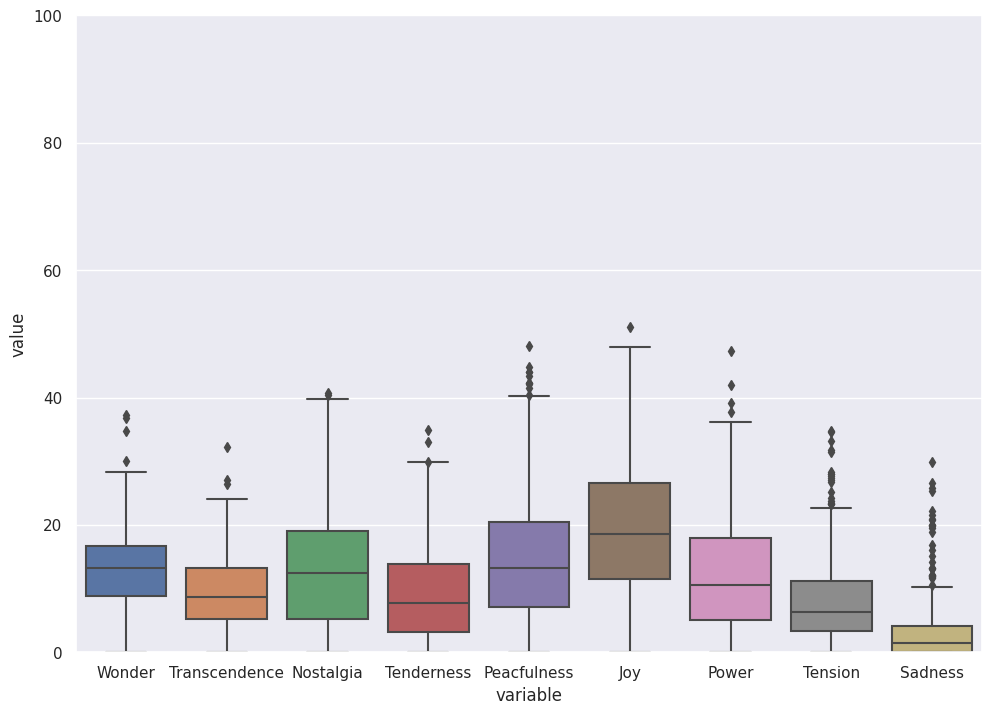

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

box = sns.boxplot(x="variable", y="value", data=pd.melt(emma_df[GEMS_9]) )
box.set(ylim=(0,100))

In [42]:
data = pd.melt(emma_df[GEMS_9])

data["hue"] = data["variable"].apply(lambda x: x[:1])
data

,variable,value,hue
0,Wonder,15.65,W
1,Wonder,24.69,W
2,Wonder,24.43,W
3,Wonder,17.27,W
4,Wonder,6.46,W
...,...,...,...
3325,Sadness,10.03,S
3326,Sadness,1.33,S
3327,Sadness,0.00,S
3328,Sadness,3.42,S


/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

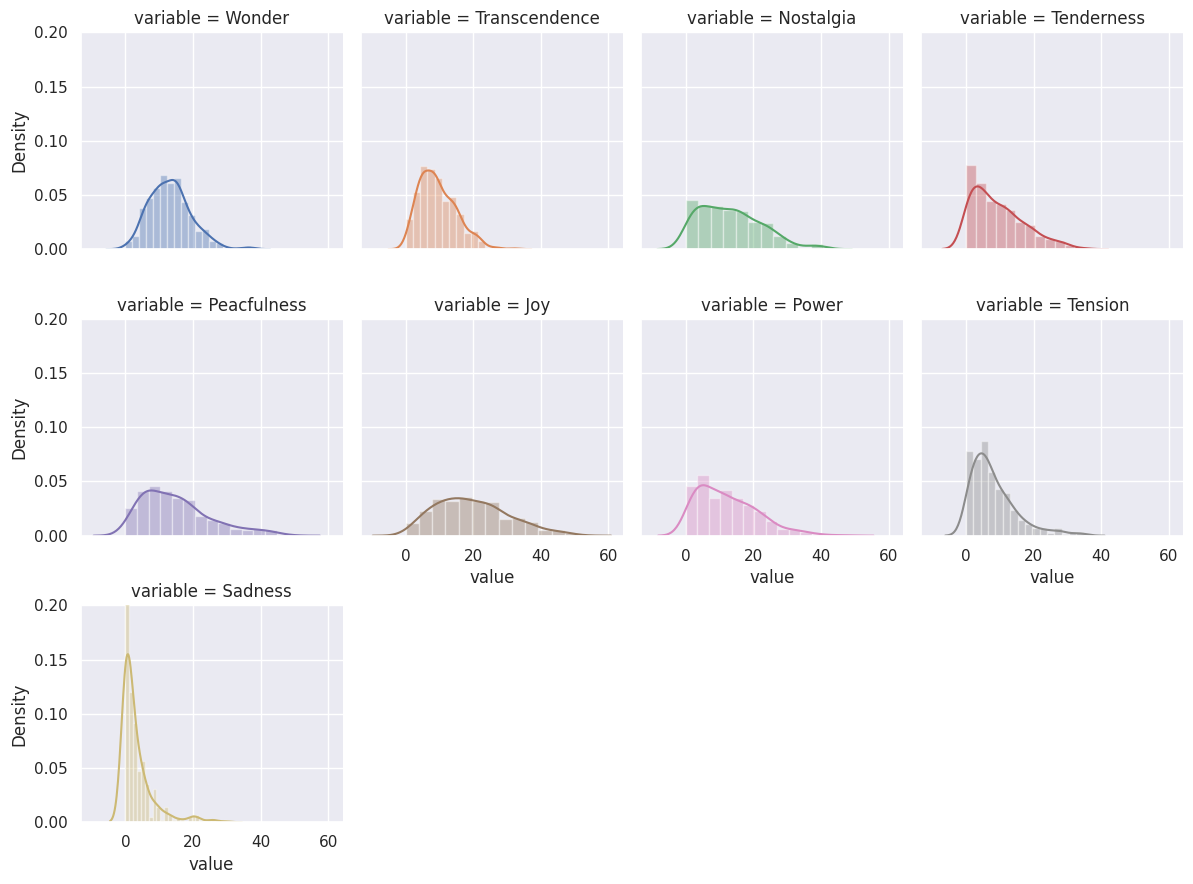

In [46]:
import matplotlib.pyplot as plt



g = sns.FacetGrid(data, col="variable", col_wrap=4, hue="variable")
g.map(sns.distplot, "value")
g.set(ylim=(0,0.2))
plt.show()

In [24]:

# Step 1: Define the bins for grouping the scores
bins = np.arange(0, 101, 5)

# Step 2: Generate the sample scores (you should replace this with your own dataset)
sample_scores = emma_df[GEMS_9]

# Step 3: Use digitize to get the bin indices
bin_indices = np.digitize(sample_scores, bins)

# Step 4: Map bin indices to the corresponding group labels
group_labels = [f"{bins[i-1]}-{bins[i]}" for i in bin_indices]

group_labels = np.array([[f"{bins[i-1]}-{bins[i]}" for i in row] for row in bin_indices])

df_grouped = pd.DataFrame(group_labels, columns=emma_df[GEMS_9].columns)

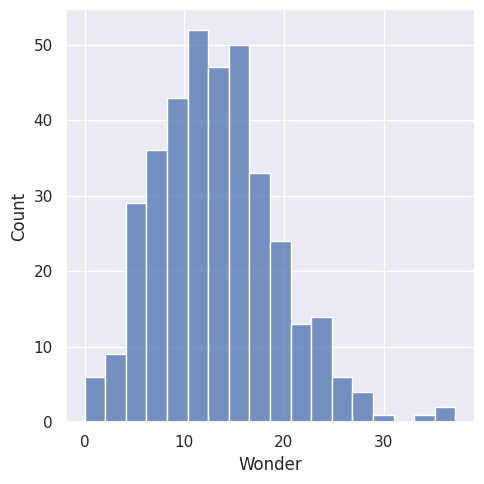

In [26]:
df_grouped
#sns.set(rc={'figure.figsize':(11.7,8.27)})

#box = sns.boxplot(x="variable", y="value", data=pd.melt(emma_df[GEMS_9]) )
#box.set(ylim=(0,100))

sns.displot(emma_df, x="Wonder")

Oversample everything over the mean value??
